In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
dataset=dataset.loc[:,'1':'589']
dataset.info()
sum1=dataset.sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 589 entries, 1 to 589
dtypes: float64(589)
memory usage: 7.0 MB


In [3]:
lis=[]
for i in range(0,589):
    if(sum1[i]==0):
        lis.append(str(i+1))

In [4]:
print(lis)

['13', '52', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 589 entries, 1 to 589
dtypes: float64(589)
memory usage: 7.0 MB


In [6]:
dataset.drop(lis, 1, inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 477 entries, 1 to 589
dtypes: float64(477)
memory usage: 5.7 MB


In [8]:
dataset=dataset.fillna(dataset.mean())
dataset.to_csv('preprocessed123.csv')

In [9]:
data=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")

In [10]:
data=data['Pass/Fail']
dataset = np.float32(dataset)

In [11]:
data=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
data1=pd.read_csv("C:/Users/Administrator/Downloads/tranformed.csv")
data2=pd.read_csv("C:/Users/Administrator/Downloads/preprocessed123.csv")
data=data['Pass/Fail']

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
m=100
kmeans = KMeans(n_clusters=m)  
kmeans.fit(data1) 
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data1)
closest=sorted(closest)
cls1=[]
for i in closest:
    cls1.append(str(i))
cls1.append('Pass/Fail')


In [13]:
m=400
kmeans = KMeans(n_clusters=m)  
kmeans.fit(data2) 
closest1, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data2)
closest1=sorted(closest1)
cls2=[]
for i in closest1:
    cls2.append(i)

In [14]:
datas=pd.read_csv("C:/Users/Administrator/Downloads/preprocessed1231.csv")
datas.shape
datas=datas.loc[:,cls1]
datas=datas.loc[cls2,:]
datar=datas['Pass/Fail']
datas=datas.iloc[:,0:-1]
datas=datas.fillna(0)
datas=np.float32(datas)
datas=pd.DataFrame(datas)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [38]:
fata=datas

In [39]:
fatar=datar

In [40]:
fatar.shape


(400,)

# Test data as y_test

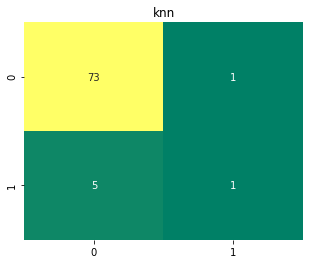

              precision    recall  f1-score   support

          -1    0.93590   0.98649   0.96053        74
           1    0.50000   0.16667   0.25000         6

   micro avg    0.92500   0.92500   0.92500        80
   macro avg    0.71795   0.57658   0.60526        80
weighted avg    0.90321   0.92500   0.90724        80

PPV= 0.5 
 NPV= 0.9358974358974359 
 sensitivity= 0.16666666666666666 
 specificity= 0.9864864864864865 
 Accuracy= 0.925


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(datas,datar,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_test,y_predict_knn,digits=5)
print(cr_rt)

tn,fp,fn,tp =confusion_matrix(y_test,y_predict_knn).ravel()
print('PPV=',tp/(tp+fp),'\n','NPV=',tn/(tn+fn),'\n','sensitivity=',tp/(tp+fn),'\n','specificity=',tn/(tn+fp),'\n','Accuracy=',(tp+tn)/(tp+tn+fp+fn))

# train data as test data

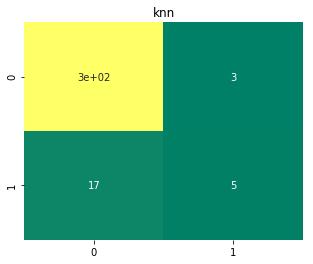

              precision    recall  f1-score   support

          -1    0.94551   0.98993   0.96721       298
           1    0.62500   0.22727   0.33333        22

   micro avg    0.93750   0.93750   0.93750       320
   macro avg    0.78526   0.60860   0.65027       320
weighted avg    0.92348   0.93750   0.92363       320

PPV= 0.625 
 NPV= 0.9455128205128205 
 sensitivity= 0.22727272727272727 
 specificity= 0.9899328859060402 
 Accuracy= 0.9375


In [16]:
y_predict_knn=model_knn.predict(x_train)
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm_knn=confusion_matrix(y_train,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_train,y_predict_knn,digits=5)
print(cr_rt)

tn,fp,fn,tp =confusion_matrix(y_train,y_predict_knn).ravel()
print('PPV=',tp/(tp+fp),'\n','NPV=',tn/(tn+fn),'\n','sensitivity=',tp/(tp+fn),'\n','specificity=',tn/(tn+fp),'\n','Accuracy=',(tp+tn)/(tp+tn+fp+fn))

In [17]:
datas.shape

(400, 100)

# Total data as test data

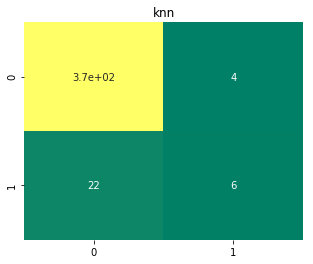

              precision    recall  f1-score   support

          -1    0.94359   0.98925   0.96588       372
           1    0.60000   0.21429   0.31579        28

   micro avg    0.93500   0.93500   0.93500       400
   macro avg    0.77179   0.60177   0.64083       400
weighted avg    0.91954   0.93500   0.92037       400

PPV= 0.6 
 NPV= 0.9435897435897436 
 sensitivity= 0.21428571428571427 
 specificity= 0.989247311827957 
 Accuracy= 0.935


In [18]:
y_predict_knn=model_knn.predict(datas)
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm_knn=confusion_matrix(datar,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(datar,y_predict_knn,digits=5)
print(cr_rt)

tn,fp,fn,tp =confusion_matrix(datar,y_predict_knn).ravel()
print('PPV=',tp/(tp+fp),'\n','NPV=',tn/(tn+fn),'\n','sensitivity=',tp/(tp+fn),'\n','specificity=',tn/(tn+fp),'\n','Accuracy=',(tp+tn)/(tp+tn+fp+fn))

# Select rows only in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 477 entries, 0 to 476
dtypes: float32(477)
memory usage: 745.4 KB


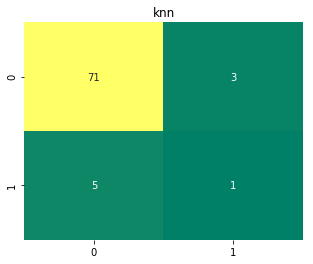

              precision    recall  f1-score   support

          -1    0.93421   0.95946   0.94667        74
           1    0.25000   0.16667   0.20000         6

   micro avg    0.90000   0.90000   0.90000        80
   macro avg    0.59211   0.56306   0.57333        80
weighted avg    0.88289   0.90000   0.89067        80

PPV= 0.25 
 NPV= 0.9342105263157895 
 sensitivity= 0.16666666666666666 
 specificity= 0.9594594594594594 
 Accuracy= 0.9


In [19]:
datas=pd.read_csv("C:/Users/Administrator/Downloads/preprocessed123.csv")
datas=datas.loc[cls2,:]
data=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
data=data.loc[cls2,:]
datar=data['Pass/Fail']
datas=datas.iloc[:,0:-1]
datas=datas.fillna(0)
datas=np.float32(datas)
datas=pd.DataFrame(datas)
datas.info()#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(datas,datar,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()
cr_rt=classification_report(y_test,y_predict_knn,digits=5)
print(cr_rt)

tn,fp,fn,tp =confusion_matrix(y_test,y_predict_knn).ravel()
print('PPV=',tp/(tp+fp),'\n','NPV=',tn/(tn+fn),'\n','sensitivity=',tp/(tp+fn),'\n','specificity=',tn/(tn+fp),'\n','Accuracy=',(tp+tn)/(tp+tn+fp+fn))

In [20]:
pata=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
patar=pata['Pass/Fail']

In [21]:
pata=pata.iloc[0:400,1:101]
patar=patar.iloc[0:400,]

In [22]:

pata=pata.fillna(dataset.mean())

In [23]:
pata = np.float32(pata)

In [26]:
lis=[]
lis1=[]
for i in range(0,400,10):
    for j in range(i,i+10):
        lis.append(j)                
    pata=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
    patar=pata['Pass/Fail']
    pata=pata.iloc[0:400,1:101]
    patar=patar.iloc[0:400,]
    pata=pata.fillna(dataset.mean())
    pata.drop(lis, 0, inplace=True)
    patar.drop(lis, 0, inplace=True)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(pata,patar,test_size=0.2,random_state=0)
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(x_train,y_train)
    y_pred=svclassifier.predict(x_test)
    from sklearn.metrics import classification_report,confusion_matrix
    tn,fp,fn,tp =confusion_matrix(y_test,y_pred).ravel()
    print('Accuracy=',(tp+tn)/(tp+tn+fp+fn))
    lis1.append((tp+tn)/(tp+tn+fp+fn))

Accuracy= 0.8461538461538461
Accuracy= 0.7894736842105263
Accuracy= 0.7567567567567568
Accuracy= 0.8333333333333334
Accuracy= 0.8571428571428571
Accuracy= 0.8970588235294118
Accuracy= 0.8333333333333334
Accuracy= 0.8125
Accuracy= 0.7903225806451613
Accuracy= 0.8333333333333334
Accuracy= 0.7931034482758621
Accuracy= 0.875
Accuracy= 0.9259259259259259
Accuracy= 0.7884615384615384
Accuracy= 0.78
Accuracy= 0.7291666666666666
Accuracy= 0.8695652173913043
Accuracy= 0.8636363636363636
Accuracy= 0.8571428571428571
Accuracy= 0.8
Accuracy= 0.7631578947368421
Accuracy= 0.6666666666666666
Accuracy= 0.6176470588235294
Accuracy= 0.65625
Accuracy= 0.6333333333333333
Accuracy= 0.75
Accuracy= 0.8076923076923077
Accuracy= 0.7916666666666666
Accuracy= 0.7727272727272727
Accuracy= 0.7
Accuracy= 0.7777777777777778
Accuracy= 0.6875
Accuracy= 0.9285714285714286
Accuracy= 0.75
Accuracy= 0.8


ValueError: not enough values to unpack (expected 4, got 1)

In [36]:
import random   

In [37]:
pata=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
patar=pata['Pass/Fail']
pata=pata.iloc[0:400,1:101]
patar=patar.iloc[0:400,]

In [38]:
itr=1
newdata=[[0]*100]*400
newdata=pd.DataFrame(newdata)
while(itr<10):
    for i in range(0,399):
        x=[]
        x.append(int(random.uniform(1,399)))
        x.append(int(random.uniform(1,399)))
        x.append(int(random.uniform(1,399)))
        for j in range(0,99):
            ran=random.random()
            if (ran<0.5):
                newdata.iloc[i][j]=pata.iloc[i][j]
               
            else:
                newdata.iloc[i][j]=pata.iloc[x[0]][j]+ran*(pata.iloc[x[1]][j]-pata.iloc[x[2]][j])
                     
    itr=itr+1
    

In [ ]:
newdata

In [ ]:
lis=[]
lis1=[]
for i in range(0,400,10):
    for j in range(i,i+10):
        lis.append(j)                
    pata=pd.read_csv("C:/Users/Administrator/Downloads/uci-secom.csv")
    patar=pata['Pass/Fail']
    pata=newdata
    patar=patar.iloc[0:400,]
    pata=pata.fillna(dataset.mean())
    pata.drop(lis, 0, inplace=True)
    patar.drop(lis, 0, inplace=True)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(pata,patar,test_size=0.2,random_state=0)
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(x_train,y_train)
    y_pred=svclassifier.predict(x_test)
    from sklearn.metrics import classification_report,confusion_matrix
    tn,fp,fn,tp =confusion_matrix(y_test,y_pred).ravel()
    print('Accuracy=',(tp+tn)/(tp+tn+fp+fn))
    lis1.append((tp+tn)/(tp+tn+fp+fn))

Accuracy= 0.782051282051282
Accuracy= 0.8421052631578947
Accuracy= 0.7432432432432432
Accuracy= 0.8194444444444444
Accuracy= 0.8714285714285714
Accuracy= 0.8382352941176471
Accuracy= 0.7878787878787878
